<a href="https://colab.research.google.com/github/fralfaro/MAT306/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT306 - Laboratorio N°05





**Objetivo**: Explorar y visualizar datos de Netflix usando **matplotlib** y **seaborn/plotly**, aprendiendo a elegir gráficos adecuados para distintos tipos de variables y preguntas de análisis.



**Dataset**:

Trabajaremos con el archivo `netflix_titles.csv`, que contiene información sobre los títulos disponibles en la plataforma Netflix hasta el año 2021.

| Variable       | Clase     | Descripción                                                                 |
|----------------|-----------|------------------------------------------------------------------------------|
| show_id        | caracter  | Identificador único del título en el catálogo de Netflix.                   |
| type           | caracter  | Tipo de contenido: 'Movie' o 'TV Show'.                                     |
| title          | caracter  | Título del contenido.                                                       |
| director       | caracter  | Nombre del director (puede ser nulo).                                       |
| cast           | caracter  | Lista de actores principales (puede ser nulo).                              |
| country        | caracter  | País o países donde se produjo el contenido.                                |
| date_added     | fecha     | Fecha en la que el título fue agregado al catálogo de Netflix.              |
| release_year   | entero    | Año de lanzamiento original del título.                                     |
| rating         | caracter  | Clasificación por edad (por ejemplo: 'PG-13', 'TV-MA').                      |
| duration       | caracter  | Duración del contenido (minutos o número de temporadas para series).        |
| listed_in      | caracter  | Categorías o géneros en los que está clasificado el contenido.              |
| description    | caracter  | Breve sinopsis del contenido.                                               |




In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [17]:
import pandas as pd

# Cargar datos
df = pd.read_csv('https://raw.githubusercontent.com/fralfaro/MAT306/main/docs/labs/data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 📊 Parte 1: Exploración visual básica

1. **Distribución de tipos de contenido**

   * Realiza un gráfico de barras mostrando la cantidad de películas vs series (`type`).
   * Pregunta guía: ¿Cuál es el tipo de contenido predominante en Netflix? ¿Qué implicancias podría tener para los usuarios?

2. **Histograma de años de lanzamiento**

   * Muestra cómo se distribuyen los títulos según su `release_year`.
   * Pregunta guía: ¿Hay más contenido reciente o antiguo? ¿Notas algún patrón en décadas específicas?

3. **Proporción de clasificaciones por edad (`rating`)**

   * Haz un gráfico circular o de barras.
   * Pregunta guía: ¿Qué clasificación es más común? ¿Crees que Netflix está más enfocado en público adulto, familiar o infantil?



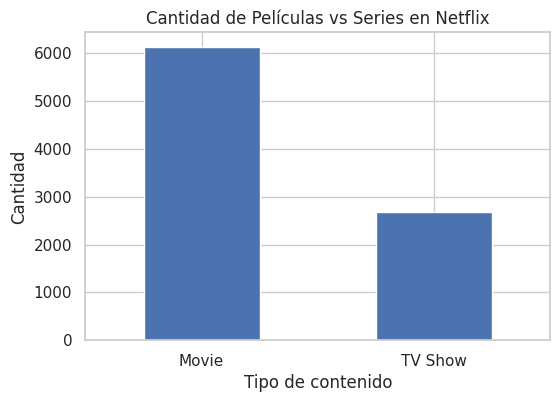

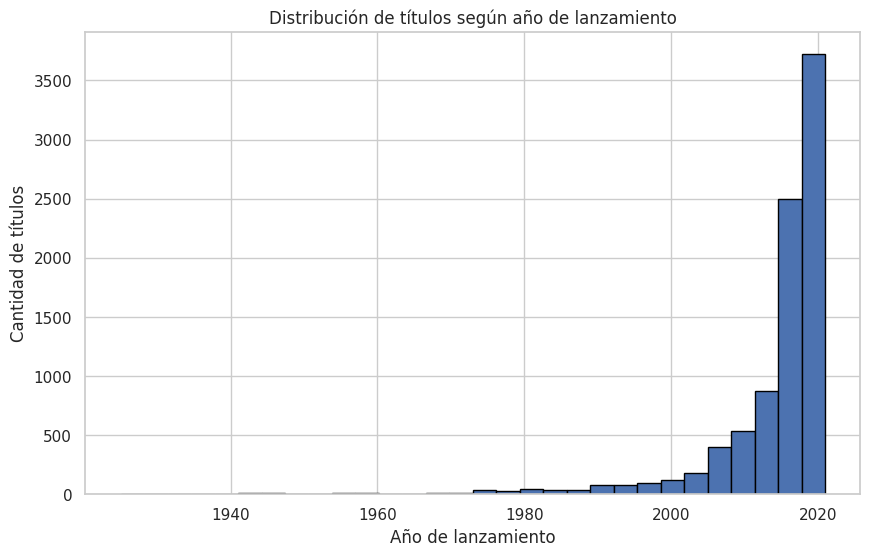

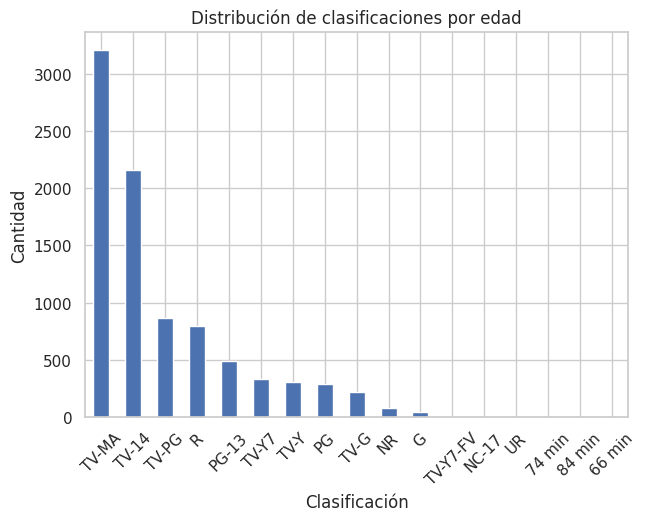

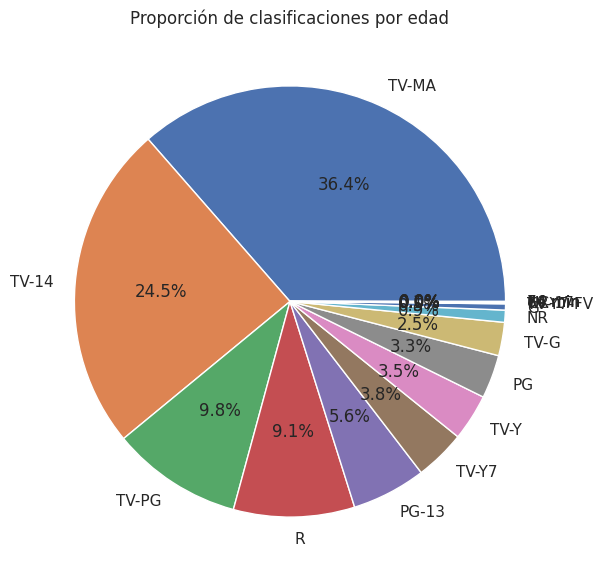

In [18]:
#Este código fue creado con apoyo de chatgpt

import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Distribución de tipos de contenido ---
plt.figure(figsize=(6,4))
df['type'].value_counts().plot(kind='bar')
plt.title("Cantidad de Películas vs Series en Netflix")
plt.xlabel("Tipo de contenido")
plt.ylabel("Cantidad")
plt.xticks(rotation=0)
plt.show()
print("\n")
# --- 2. Histograma de años de lanzamiento ---
plt.figure(figsize=(10,6))
df['release_year'].plot(kind='hist', bins=30, edgecolor='black')
plt.title("Distribución de títulos según año de lanzamiento")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Cantidad de títulos")
plt.show()
print("\n")
# --- 3. Proporción de clasificaciones por edad ---
plt.figure(figsize=(7,5))
df['rating'].value_counts().plot(kind='bar')
plt.title("Distribución de clasificaciones por edad")
plt.xlabel("Clasificación")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.show()
print("\n")
# Si prefieres gráfico circular:
plt.figure(figsize=(7,7))
df['rating'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Proporción de clasificaciones por edad")
plt.ylabel("")  # Ocultamos etiqueta por estética
plt.show()



## 🎨 Parte 2: Tendencias y evolución en el tiempo

4. **Número de títulos agregados por año**

   * Usa `date_added` (convertido a fecha) y grafica una serie temporal.
   * Pregunta guía: ¿Cuándo creció más el catálogo de Netflix? ¿Qué relación podría tener con la expansión internacional de la plataforma?

5. **Heatmap de lanzamientos por año y mes**

   * Construye un mapa de calor con `year_added` y `month_added`.
   * Pregunta guía: ¿Hay meses con más estrenos que otros? ¿Qué conclusiones puedes sacar sobre la estacionalidad de lanzamientos?

6. **Duración de películas por género**

   * Extrae la duración en minutos y crea un boxplot agrupado por género principal.
   * Pregunta guía: ¿Qué géneros suelen durar más? ¿Qué podrías decir sobre la variabilidad dentro de un mismo género?


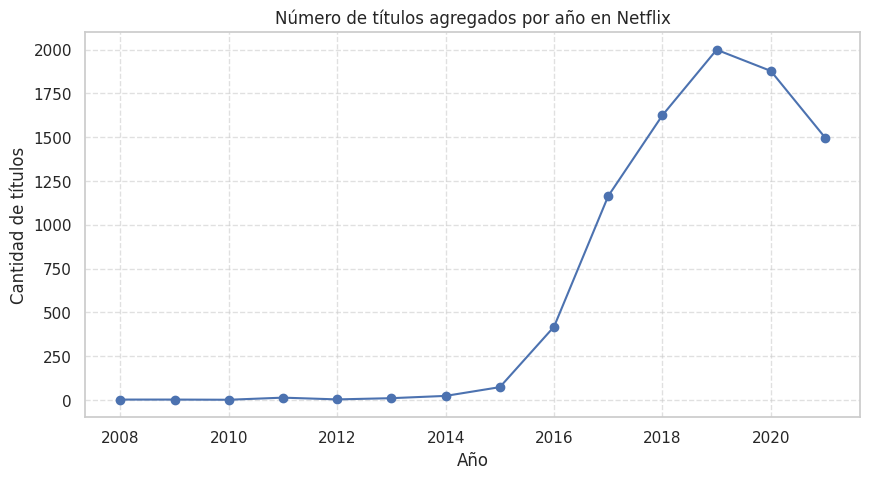

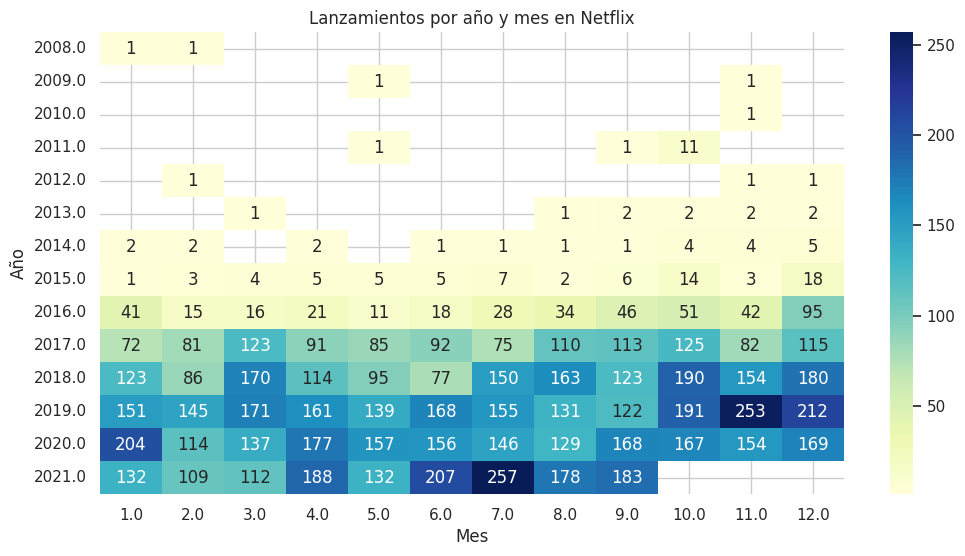

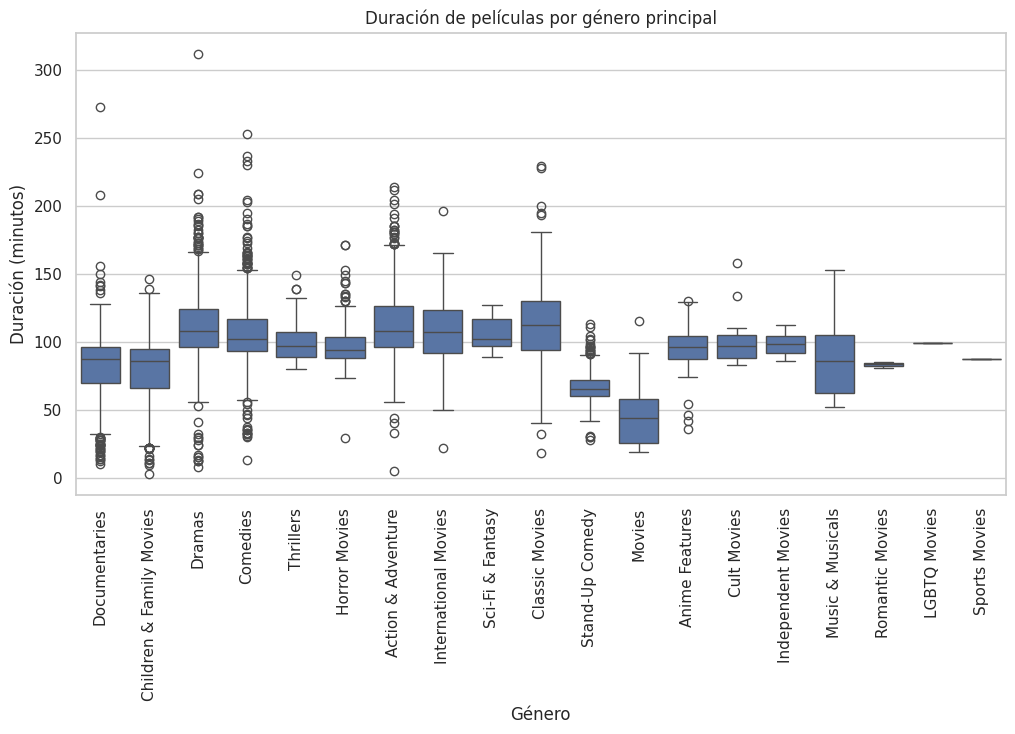

In [19]:
#Código generado con ayuda de CHAT GPT
import seaborn as sns

# Aseguramos que date_added sea tipo datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extraemos año y mes
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# -------------------------------------------------------------------
# 1. Número de títulos agregados por año (serie temporal)
# -------------------------------------------------------------------
plt.figure(figsize=(10,5))
df['year_added'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title("Número de títulos agregados por año en Netflix")
plt.xlabel("Año")
plt.ylabel("Cantidad de títulos")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
print("\n")
# -------------------------------------------------------------------
# 2. Heatmap de lanzamientos por año y mes
# -------------------------------------------------------------------
heatmap_data = df.pivot_table(
    index='year_added',
    columns='month_added',
    values='show_id',
    aggfunc='count'
)

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Lanzamientos por año y mes en Netflix")
plt.xlabel("Mes")
plt.ylabel("Año")
plt.show()
print("\n")
# -------------------------------------------------------------------
# 3. Duración de películas por género (boxplot)
# -------------------------------------------------------------------
# Filtramos solo películas y sacamos duración en minutos
movies = df[df['type'] == 'Movie'].copy()
movies['duration_minutes'] = movies['duration'].str.replace(" min","").astype(float)

# Tomamos solo el primer género como género principal
movies['main_genre'] = movies['listed_in'].str.split(',').str[0]

plt.figure(figsize=(12,6))
sns.boxplot(data=movies, x='main_genre', y='duration_minutes')
plt.xticks(rotation=90)
plt.title("Duración de películas por género principal")
plt.xlabel("Género")
plt.ylabel("Duración (minutos)")
plt.show()

En promedio las películas clasicas son un poco más largas que los dramas, pero parece haber algunos puntos átipicos en el género drama que supera con creses al resto de las películas.



## 🔥 Parte 3: Comparaciones y relaciones

7. **Top 10 países con más producciones**

   * Usa un gráfico de barras para mostrar los países más frecuentes en la columna `country`.
   * Pregunta guía: ¿Qué países dominan el catálogo? ¿Sorprende la distribución o es esperada?

8. **Películas vs Series según género**

   * Realiza un gráfico de barras apiladas para mostrar la cantidad de títulos por género, separando `Movie` y `TV Show`.
   * Pregunta guía: ¿Existen géneros más asociados a películas o a series?

9. **Relación entre duración y año de lanzamiento**

   * Haz un gráfico de dispersión (scatterplot) con `release_year` en el eje X y `duration` (en minutos) en el eje Y.
   * Pregunta guía: ¿Han cambiado los estándares de duración de las películas con el tiempo? ¿Se ven outliers interesantes?



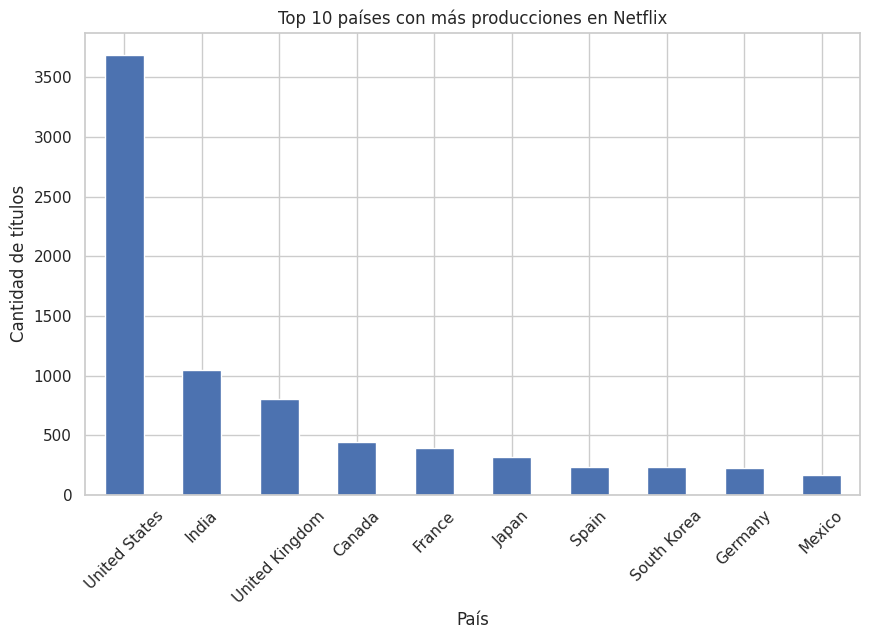

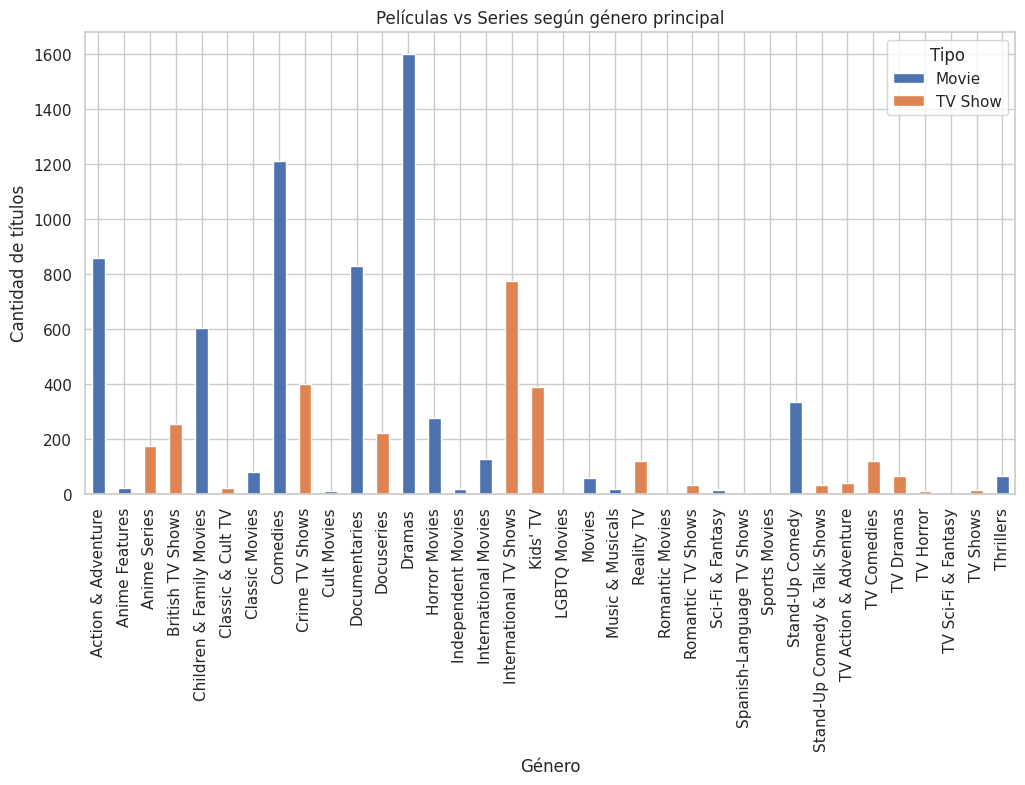

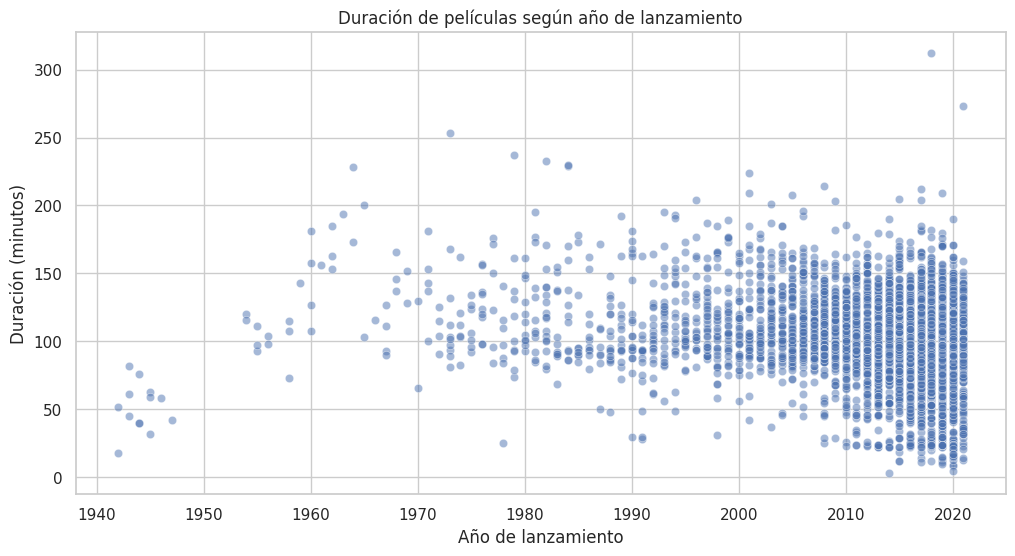

In [20]:
#Código generado con ayuda de chatgpt

# -------------------------------------------------------------------
# 1. Top 10 países con más producciones
# -------------------------------------------------------------------
plt.figure(figsize=(10,6))
df['country'].dropna().str.split(',').explode().str.strip().value_counts().head(10).plot(kind='bar')
plt.title("Top 10 países con más producciones en Netflix")
plt.xlabel("País")
plt.ylabel("Cantidad de títulos")
plt.xticks(rotation=45)
plt.show()
print("\n")
# -------------------------------------------------------------------
# 2. Películas vs Series según género (barras apiladas)
# -------------------------------------------------------------------
# Tomamos solo el primer género
df['main_genre'] = df['listed_in'].str.split(',').str[0]

genre_type_counts = df.groupby(['main_genre','type']).size().unstack(fill_value=0)

genre_type_counts.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Películas vs Series según género principal")
plt.xlabel("Género")
plt.ylabel("Cantidad de títulos")
plt.xticks(rotation=90)
plt.legend(title="Tipo")
plt.show()
print("\n")
# -------------------------------------------------------------------
# 3. Relación entre duración y año de lanzamiento (scatterplot)
# -------------------------------------------------------------------
movies = df[df['type']=="Movie"].copy()
movies['duration_minutes'] = movies['duration'].str.replace(" min","", regex=True).astype(float)

plt.figure(figsize=(12,6))
sns.scatterplot(data=movies, x='release_year', y='duration_minutes', alpha=0.5)
plt.title("Duración de películas según año de lanzamiento")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Duración (minutos)")
plt.show()

## ⭐ Desafío Final

* Encuentra las combinaciones más frecuentes de **género + rating** y represéntalas en un **heatmap o gráfico de burbujas**.
* Pregunta guía: ¿Qué géneros están más dirigidos a un público adulto? ¿Y cuáles a público familiar o infantil?

# FIXME